# Investigating Impact of *Distracted Driver* on Probability and Odds of Roundabout vs. Intersection Crash

In [ ]:
# install dependencies
!pip install numpy matplotlib scipy pandas seaborn pingouin

In [10]:
# import directives
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import ttest_rel
import pingouin as pt

In [11]:
# Preprocessing -- should be general-purpose
# load data
intersection = pd.read_csv("distract_intersection.csv").replace(',','', regex=True).fillna(0)
roundabout = pd.read_csv("distract_roundabout.csv").replace(',','', regex=True).fillna(0)

# Parse crash year and date
month_map = {
    "January": "1",
    "February": "2",
    "March": "3",
    "April": "4",
    "May": "5",
    "June": "6",
    "July": "7",
    "August": "8",
    "September": "9",
    "October": "10",
    "November": "11",
    "December": "12"
}
intersection['Crash Month'] = intersection['Crash Month'].map(month_map)
intersection['Crash Date'] = pd.to_datetime(intersection['Crash Year'] + "/" + intersection['Crash Month'] + "/01")
intersection.drop(['Crash Year', 'Crash Month'], axis=1, inplace=True)
roundabout['Crash Month'] = roundabout['Crash Month'].map(month_map)
roundabout['Crash Date'] = pd.to_datetime(roundabout['Crash Year'] + "/" + roundabout['Crash Month'] + "/01")
roundabout.drop(['Crash Year', 'Crash Month'], axis=1, inplace=True)

In [12]:
# Drop unnecessary columns
intersection.drop('No Driver Distraction', axis=1, inplace=True)
roundabout.drop('No Driver Distraction', axis=1, inplace=True)

# Type conversion
intersection['Driver Distracted'] = intersection['Driver Distracted'].astype(float)
intersection['Total'] = intersection['Total'].astype(float)
roundabout['Driver Distracted'] = roundabout['Driver Distracted'].astype(float)
roundabout['Total'] = roundabout['Total'].astype(float)

In [13]:
intersection['Intersection %'] = intersection['Driver Distracted'] / intersection['Total']
roundabout['Roundabout %'] = roundabout['Driver Distracted'] / roundabout['Total']

intersection.drop(['Driver Distracted', 'Total'], axis=1, inplace=True)
roundabout.drop(['Driver Distracted', 'Total'], axis=1, inplace=True)

In [14]:
# Aggregate data
aggregate = pd.merge(intersection, roundabout, on=['Crash Date'])

# save aggregated values for later and remove them from table
avg = aggregate.iloc[len(aggregate) - 1].to_dict()

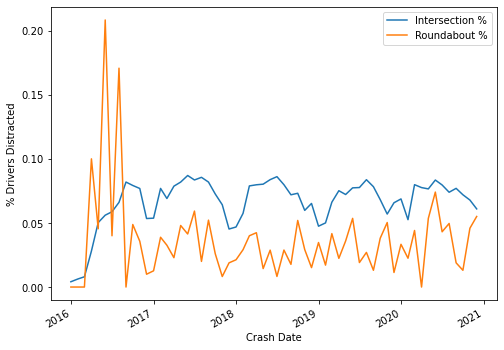

In [15]:
# plot data
aggregate.plot(x='Crash Date', kind='line', ylabel="% Drivers Distracted", figsize=(8,6))
plt.savefig('distracted_plot.png')

In [16]:
# perform t-test on the conditional probability of the evidence's occurrence
pt.ttest(aggregate['Intersection %'], aggregate['Roundabout %'], paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,6.240411,60,two-sided,4.856732e-08,"[0.02, 0.04]",1.094908,2.728e+05,1.0


In [17]:
# compute Bayes' factor for impact of evidence on roundabout crash vs intersection crash odds
print(avg['Roundabout %'] / avg['Intersection %'])

0.4950247514089112


## Conclusion

Given that the $t$-test yielded the $p$-value of $4.86 \times 10^{-8} < 0.05$, we reject the null hypothesis, and come to the conclusion that
**driver distraction** does constitute a statistically significant characteristic to the occurence of traffic crashes in roundabouts.

This difference can be quantified by the Bayes' factor of 0.495.